# Predicting Heart Disease Mortality 

#### *Adrian R Angkawijaya*
#### *July 2018*

# *Introduction*

This is the Microsoft Professional Program Capstone challenge hosted by Microsoft and DrivenData. The project objective is to predict Heart Disease Mortality in the United States from a number of given variables. The data is provided from the challenge website itself and consists of a number of features including the information about the counties, economic indicators, health indicators and the demographics information. Click [here](https://www.datasciencecapstone.org/competitions/7/heart-disease/page/23/) to learn more about the project description. 

The prediction is scored by evaluating the error metrics of RMSE value. My final best model placed me in the rank 9th out of 376 competitors when I first submitted the final prediction. 

**Let's start by importing some necessary libraries**

In [1]:
## Data Analysis
import math
import numpy as np
import numpy.random as nr
import pandas as pd
import scipy.stats as ss 

## Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Machine Learning
import sklearn.metrics as sklm
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

## Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

**Here we load the datasets as follows:**

In [2]:
train = pd.read_csv("/Users/adrianromano/Downloads/MicrosoftProfessionalProgram/DAT102x_Predicting_Heart_Disease_Mortality_-_Training_values.csv")
label = pd.read_csv("/Users/adrianromano/Downloads/MicrosoftProfessionalProgram/DAT102x_Predicting_Heart_Disease_Mortality_-_Training_labels.csv")

test = pd.read_csv("/Users/adrianromano/Downloads/MicrosoftProfessionalProgram/DAT102x_Predicting_Heart_Disease_Mortality_-_Test_values.csv")
test_Id = test["row_id"]

**Check the dimensions of the train and test dataset**

In [3]:
print("Train data dimension: " + str(train.shape))
print("--------------------------------")
print("Test data dimension: " + str(test.shape))

Train data dimension: (3198, 34)
--------------------------------
Test data dimension: (3080, 34)


**See the first few lines of the train data**

In [4]:
train.head()

row_id                                         area__rucc  \
0       0  Metro - Counties in metro areas of fewer than ...   
1       1  Metro - Counties in metro areas of fewer than ...   
2       4  Metro - Counties in metro areas of 1 million p...   
3       5  Nonmetro - Urban population of 2,500 to 19,999...   
4       6  Nonmetro - Urban population of 2,500 to 19,999...   

                               area__urban_influence  econ__economic_typology  \
0  Small-in a metro area with fewer than 1 millio...  Manufacturing-dependent   
1  Small-in a metro area with fewer than 1 millio...         Mining-dependent   
2  Large-in a metro area with at least 1 million ...           Nonspecialized   
3  Noncore adjacent to a small metro with town of...           Nonspecialized   
4  Noncore not adjacent to a metro/micro area and...           Nonspecialized   

   econ__pct_civilian_labor  econ__pct_unemployment  \
0                     0.408                   0.057   
1                     0.556                   0.039   
2                     0.541                   0.057   
3                     0.500                   0.061   
4                     0.471                   0.050   

   econ__pct_uninsured_adults  econ__pct_uninsured_children  demo__pct_female  \
0                       0.254                         0.066             0.516   
1                       0.260                         0.143             0.503   
2                       0.070                         0.023             0.522   
3                       0.203                         0.059             0.525   
4                       0.225                         0.103             0.511   

   demo__pct_below_18_years_of_age ...  health__pct_diabetes  \
0                            0.235 ...                 0.131   
1                            0.272 ...                 0.090   
2                            0.179 ...                 0.084   
3                            0.200 ...                 0.104   
4                            0.237 ...                 0.137   

   health__pct_low_birthweight  health__pct_excessive_drinking  \
0                        0.089                             NaN   
1                        0.082                           0.181   
2                        0.098                           0.195   
3                        0.058                             NaN   
4                        0.070                           0.194   

   health__pct_physical_inacticity  health__air_pollution_particulate_matter  \
0                            0.332                                      13.0   
1                            0.265                                      10.0   
2                            0.209                                      10.0   
3                            0.238                                      13.0   
4                            0.290                                       9.0   

   health__homicides_per_100k  health__motor_vehicle_crash_deaths_per_100k  \
0                        2.80                                        15.09   
1                        2.30                                        19.79   
2                        9.31                                         3.14   
3                         NaN                                          NaN   
4                         NaN                                        29.39   

   health__pop_per_dentist  health__pop_per_primary_care_physician  yr  
0                   1650.0                                  1489.0   a  
1                   2010.0                                  2480.0   a  
2                    629.0                                   690.0   b  
3                   1810.0                                  6630.0   b  
4                   3489.0                                  2590.0   a  

[5 rows x 34 columns]

# *Data Cleaning*

**Check if the datasets contain any duplicates:**

In [5]:
print(train.shape)
print(train.row_id.unique().shape)

(3198, 34)
(3198,)


In [6]:
print(test.shape)
print(test.row_id.unique().shape)

(3080, 34)
(3080,)


**Note**: Looks like no duplicates are found!

**Let's combine the train and test sets together to clean them as one full data**

In [7]:
full = pd.concat([train, test], axis = 0)

**Here we check the number of missing values for each columns:**

In [8]:
full_NA = full.isnull().sum()
full_NA = full_NA.drop(full_NA[full_NA == 0].index).sort_values(ascending = False)

print(full_NA)

health__homicides_per_100k                     3797
health__pct_excessive_drinking                 1838
health__pct_adult_smoking                       866
health__motor_vehicle_crash_deaths_per_100k     762
health__pop_per_dentist                         442
health__pop_per_primary_care_physician          414
health__pct_low_birthweight                     329
health__air_pollution_particulate_matter         66
demo__pct_non_hispanic_african_american          10
econ__pct_uninsured_children                     10
demo__pct_female                                 10
demo__pct_below_18_years_of_age                  10
demo__pct_aged_65_years_and_older                10
demo__pct_hispanic                               10
health__pct_adult_obesity                        10
demo__pct_non_hispanic_white                     10
demo__pct_american_indian_or_alaskan_native      10
demo__pct_asian                                  10
health__pct_diabetes                             10
health__pct_

**Replace the missing values with the median of each respective column**

In [9]:
full["health__homicides_per_100k"].fillna(full["health__homicides_per_100k"].median(), inplace=True)
full["health__pct_excessive_drinking"].fillna(full["health__pct_excessive_drinking"].median(), inplace=True)
full["health__pct_adult_smoking"].fillna(full["health__pct_adult_smoking"].median(), inplace=True)
full["health__motor_vehicle_crash_deaths_per_100k"].fillna(full["health__motor_vehicle_crash_deaths_per_100k"].median(), inplace=True)
full["health__pop_per_dentist"].fillna(full["health__pop_per_dentist"].median(), inplace=True)
full["health__pop_per_primary_care_physician"].fillna(full["health__pop_per_primary_care_physician"].median(), inplace=True)
full["health__pct_low_birthweight"].fillna(full["health__pct_low_birthweight"].median(), inplace=True)
full["health__air_pollution_particulate_matter"].fillna(full["health__air_pollution_particulate_matter"].median(), inplace=True)
full["demo__pct_non_hispanic_african_american"].fillna(full["demo__pct_non_hispanic_african_american"].median(), inplace=True)
full["econ__pct_uninsured_children"].fillna(full["econ__pct_uninsured_children"].median(), inplace=True)
full["demo__pct_female"].fillna(full["demo__pct_female"].median(), inplace=True)
full["demo__pct_below_18_years_of_age"].fillna(full["demo__pct_below_18_years_of_age"].median(), inplace=True)
full["demo__pct_aged_65_years_and_older"].fillna(full["demo__pct_aged_65_years_and_older"].median(), inplace=True)
full["demo__pct_hispanic"].fillna(full["demo__pct_hispanic"].median(), inplace=True)
full["health__pct_adult_obesity"].fillna(full["health__pct_adult_obesity"].median(), inplace=True)
full["demo__pct_non_hispanic_white"].fillna(full["demo__pct_non_hispanic_white"].median(), inplace=True)
full["demo__pct_american_indian_or_alaskan_native"].fillna(full["demo__pct_american_indian_or_alaskan_native"].median(), inplace=True)
full["demo__pct_asian"].fillna(full["demo__pct_asian"].median(), inplace=True)
full["health__pct_diabetes"].fillna(full["health__pct_diabetes"].median(), inplace=True)
full["health__pct_physical_inacticity"].fillna(full["health__pct_physical_inacticity"].median(), inplace=True)
full["econ__pct_uninsured_adults"].fillna(full["econ__pct_uninsured_adults"].median(), inplace=True)

**Recheck if there are any missing values left:**

In [10]:
full_NA = full.isnull().sum()
full_NA = full_NA.drop(full_NA[full_NA == 0].index).sort_values(ascending = False)

print(full_NA)

Series([], dtype: int64)


All cleaned!

# *Exploratory Data Analysis*

**Now that the data has been cleaned, we can separate them to the original train and test datasets again:**

In [11]:
train = full[:train.shape[0]]
test = full[train.shape[0]:]

**Merge train data with the label into a single data frame for the analysis:**

In [12]:
train = pd.merge(train, label, on = "row_id")
label = label["heart_disease_mortality_per_100k"]

**Drop *row_id* variable and see the summary statistics of the numerical features and label:**

In [13]:
train.drop(["row_id"], axis=1, inplace=True)
test.drop(["row_id"], axis=1, inplace=True)

train.describe()

econ__pct_civilian_labor  econ__pct_unemployment  \
count               3198.000000             3198.000000   
mean                   0.467191                0.059696   
std                    0.074400                0.022947   
min                    0.207000                0.010000   
25%                    0.420000                0.044000   
50%                    0.468000                0.057000   
75%                    0.514000                0.072000   
max                    1.000000                0.248000   

       econ__pct_uninsured_adults  econ__pct_uninsured_children  \
count                 3198.000000                   3198.000000   
mean                     0.217460                      0.086061   
std                      0.067341                      0.039837   
min                      0.046000                      0.012000   
25%                      0.166000                      0.057000   
50%                      0.216000                      0.077000   
75%                      0.261000                      0.106000   
max                      0.496000                      0.281000   

       demo__pct_female  demo__pct_below_18_years_of_age  \
count       3198.000000                      3198.000000   
mean           0.498814                         0.227715   
std            0.024392                         0.034271   
min            0.278000                         0.092000   
25%            0.493000                         0.206000   
50%            0.503000                         0.226000   
75%            0.512000                         0.246000   
max            0.573000                         0.417000   

       demo__pct_aged_65_years_and_older  demo__pct_hispanic  \
count                        3198.000000         3198.000000   
mean                            0.170041            0.090173   
std                             0.043681            0.142725   
min                             0.045000            0.000000   
25%                             0.141250            0.019000   
50%                             0.167000            0.035000   
75%                             0.195000            0.087000   
max                             0.346000            0.932000   

       demo__pct_non_hispanic_african_american  demo__pct_non_hispanic_white  \
count                              3198.000000                   3198.000000   
mean                                  0.091003                      0.770040   
std                                   0.147130                      0.207795   
min                                   0.000000                      0.053000   
25%                                   0.006000                      0.649250   
50%                                   0.022000                      0.853000   
75%                                   0.096000                      0.936000   
max                                   0.858000                      0.990000   

                     ...                 health__pct_diabetes  \
count                ...                          3198.000000   
mean                 ...                             0.109259   
std                  ...                             0.023209   
min                  ...                             0.032000   
25%                  ...                             0.094000   
50%                  ...                             0.109000   
75%                  ...                             0.124000   
max                  ...                             0.203000   

       health__pct_low_birthweight  health__pct_excessive_drinking  \
count                  3198.000000                     3198.000000   
mean                      0.083674                        0.164278   
std                       0.021627                        0.042059   
min                       0.033000                        0.038000   
25%                       0.069000                        0.146000   
50%                       

**Next look at the distribution of heart disease mortality:**

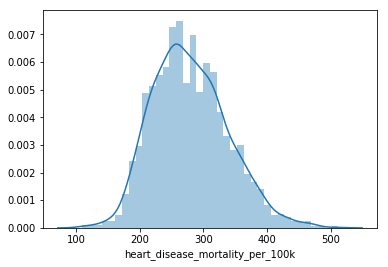

In [14]:
sns.distplot(train.heart_disease_mortality_per_100k)
plt.show()

**Note:** The distribution looks approximately normal so there is no transformation needed.

**See which numerical features has strong relationship with heart disease mortality by looking at their correlation:**

In [15]:
corr = train.corr()

corr.sort_values(["heart_disease_mortality_per_100k"], ascending = False, inplace = True)
print(corr.heart_disease_mortality_per_100k)

heart_disease_mortality_per_100k                    1.000000
health__pct_physical_inacticity                     0.649813
health__pct_diabetes                                0.631337
health__pct_adult_obesity                           0.593316
demo__pct_adults_less_than_a_high_school_diploma    0.527382
health__pct_low_birthweight                         0.464391
health__pct_adult_smoking                           0.463138
demo__death_rate_per_1k                             0.444757
health__motor_vehicle_crash_deaths_per_100k         0.435633
demo__pct_adults_with_high_school_diploma           0.428137
demo__pct_non_hispanic_african_american             0.375537
econ__pct_unemployment                              0.371620
econ__pct_uninsured_adults                          0.334027
health__pop_per_dentist                             0.292447
health__homicides_per_100k                          0.292377
health__pop_per_primary_care_physician              0.217936
health__air_pollution_pa

**Here we create density plots for each numerical features to see their distibutions:**

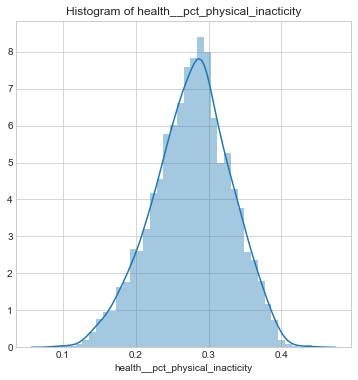

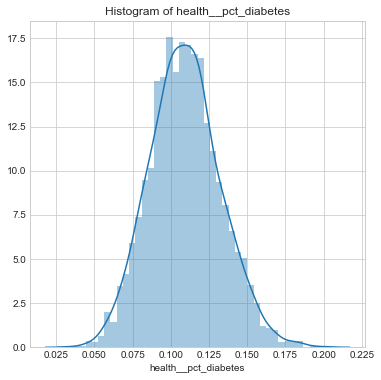

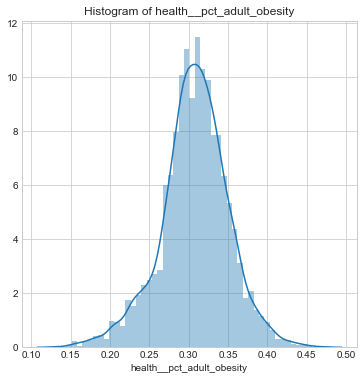

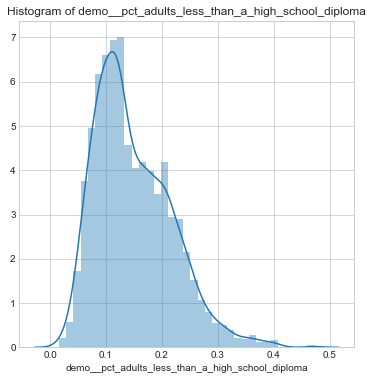

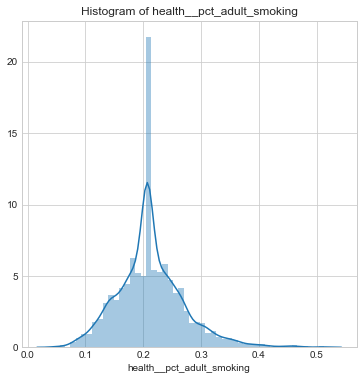

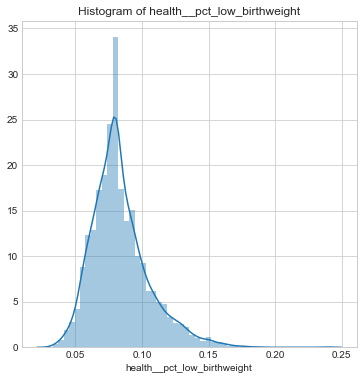

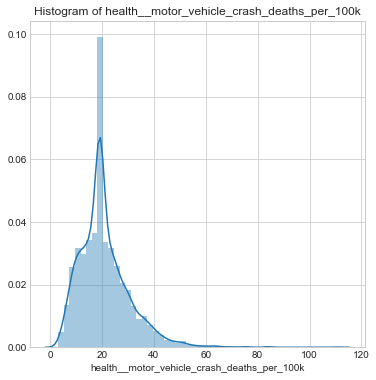

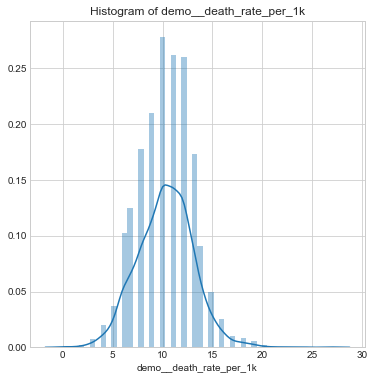

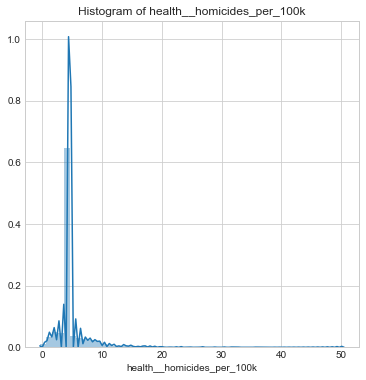

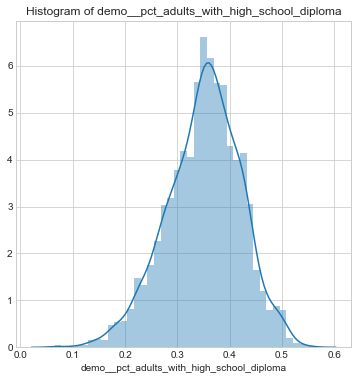

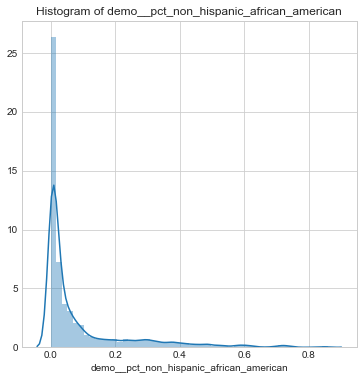

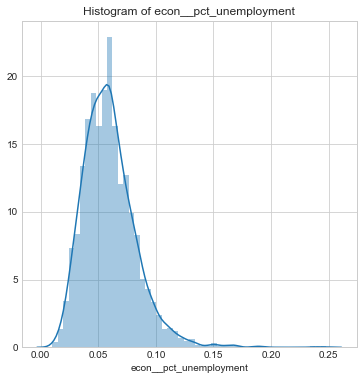

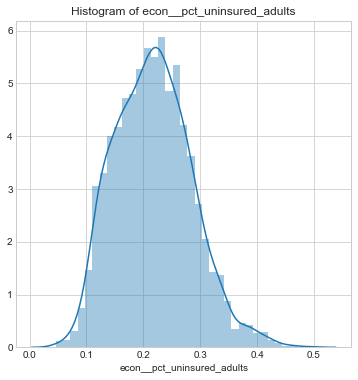

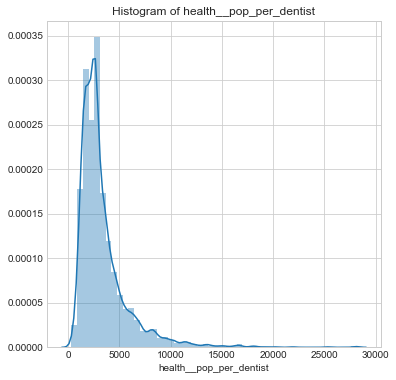

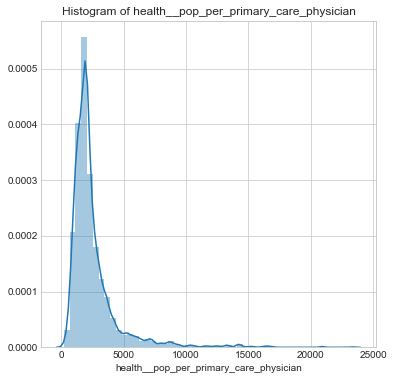

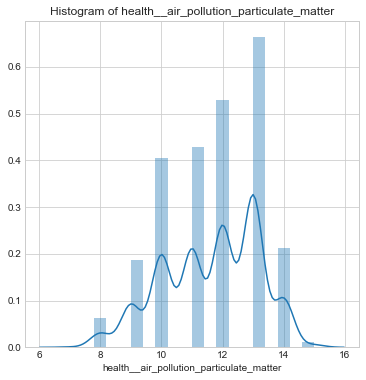

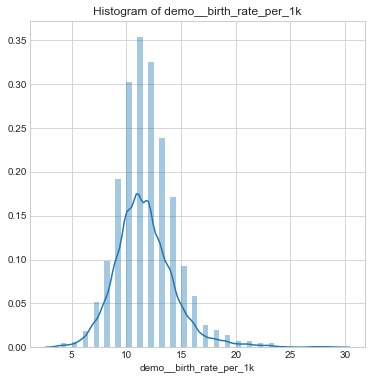

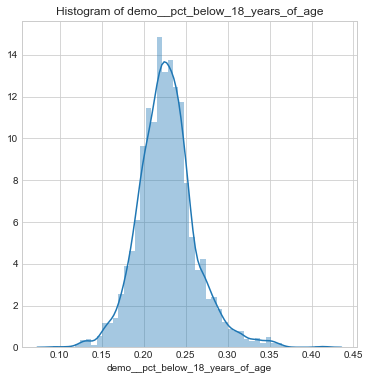

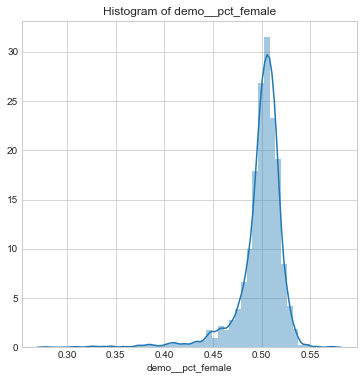

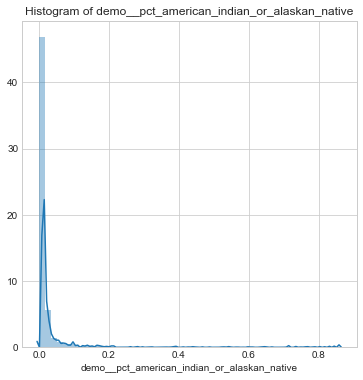

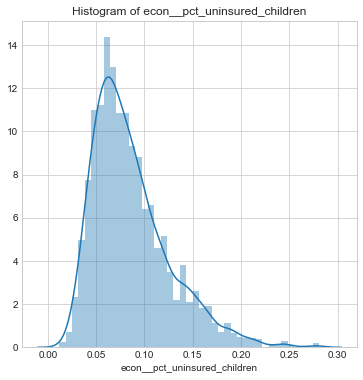

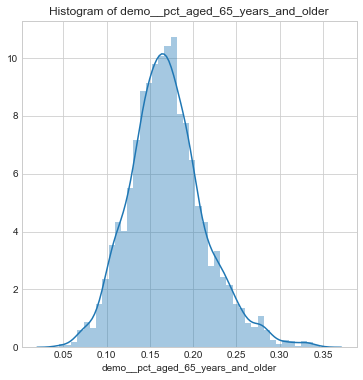

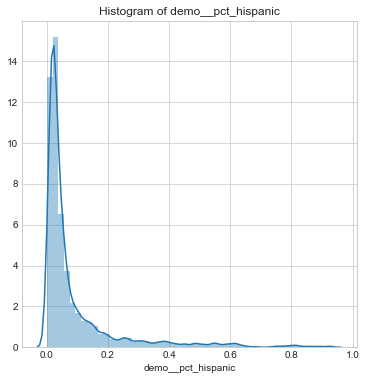

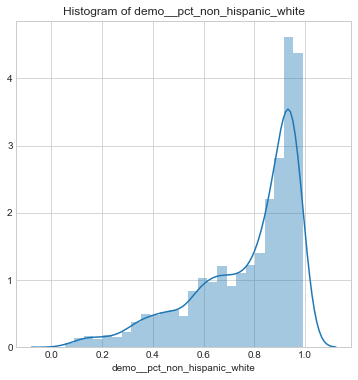

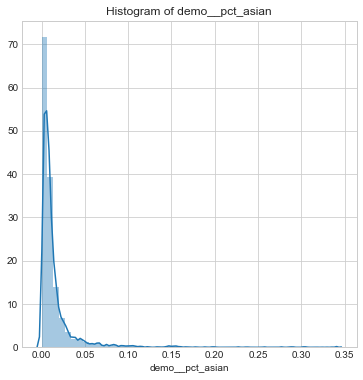

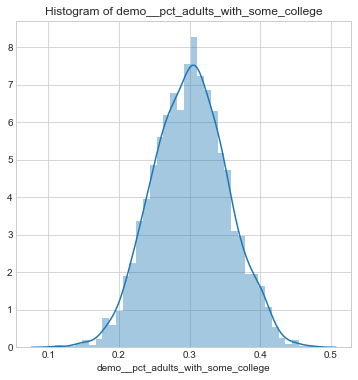

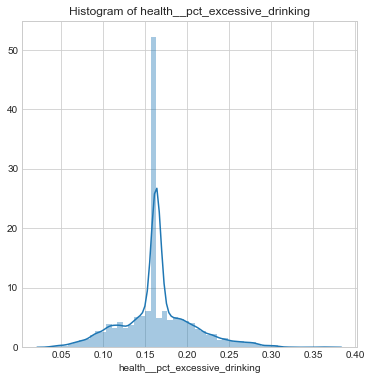

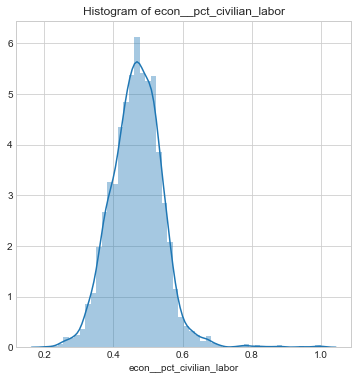

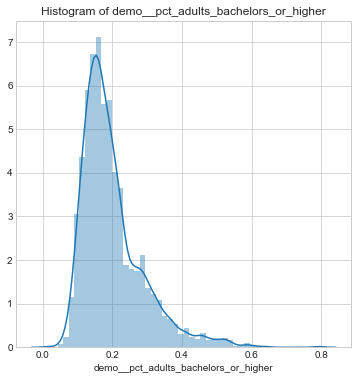

In [16]:
def plot_density_hist(train, cols, bins = 10, hist = True):
    for col in cols:
        fig = plt.figure(figsize = (6,6))
        sns.set_style("whitegrid")
        sns.distplot(train[col].dropna(), hist = hist)
        plt.title("Histogram of " + col)
        plt.xlabel(col)
        plt.ylabel("")
        plt.show

num_cols = ["health__pct_physical_inacticity", "health__pct_diabetes", "health__pct_adult_obesity", "demo__pct_adults_less_than_a_high_school_diploma",
           "health__pct_adult_smoking", "health__pct_low_birthweight", "health__motor_vehicle_crash_deaths_per_100k", "demo__death_rate_per_1k",
           "health__homicides_per_100k", "demo__pct_adults_with_high_school_diploma", "demo__pct_non_hispanic_african_american",
            "econ__pct_unemployment", "econ__pct_uninsured_adults", "health__pop_per_dentist", "health__pop_per_primary_care_physician",
            "health__air_pollution_particulate_matter", "demo__birth_rate_per_1k", "demo__pct_below_18_years_of_age", "demo__pct_female",
            "demo__pct_american_indian_or_alaskan_native", "econ__pct_uninsured_children", "demo__pct_aged_65_years_and_older", "demo__pct_hispanic",
            "demo__pct_non_hispanic_white", "demo__pct_asian", "demo__pct_adults_with_some_college", "health__pct_excessive_drinking",
            "econ__pct_civilian_labor", "demo__pct_adults_bachelors_or_higher"]
plot_density_hist(train, num_cols)

**We create scatterplots to see the relationship between each numerical features with heart disease mortality:**

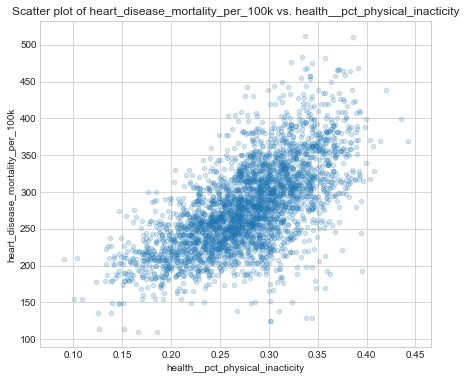

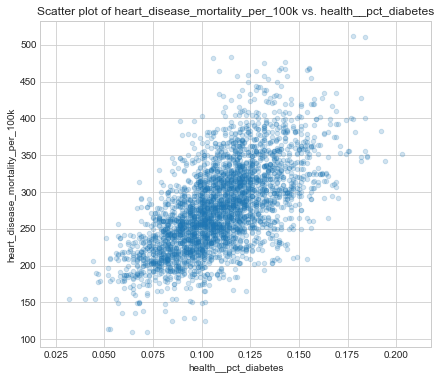

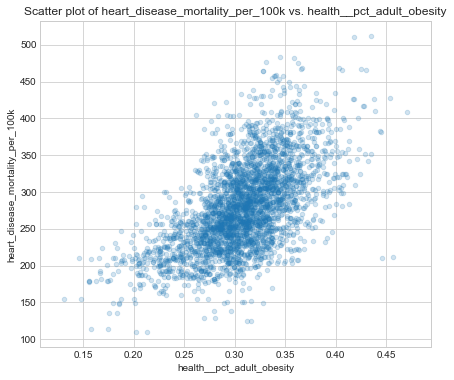

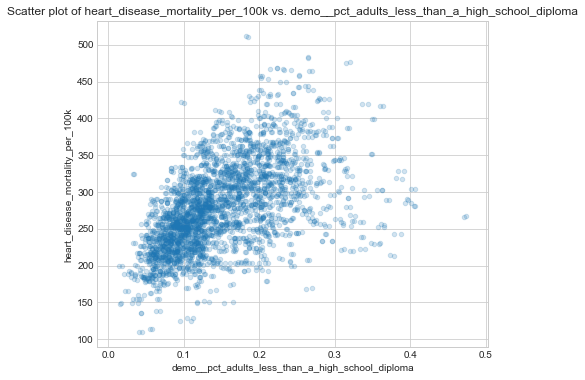

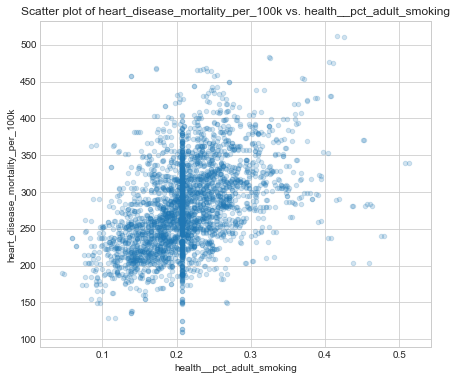

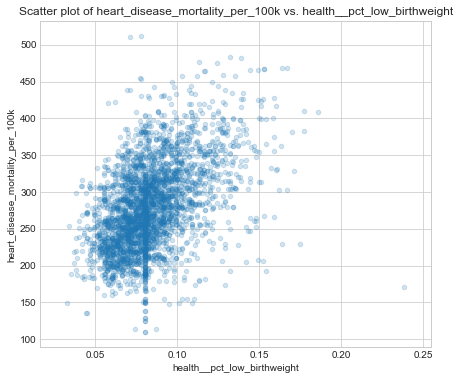

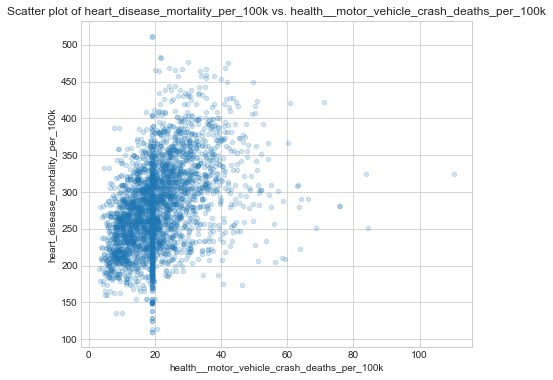

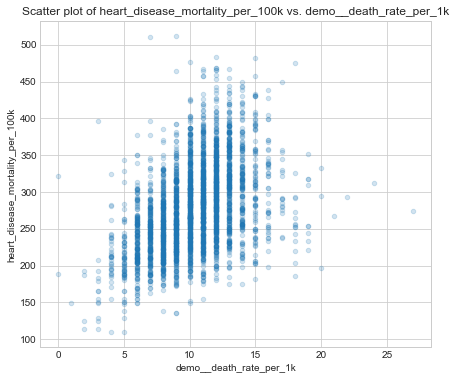

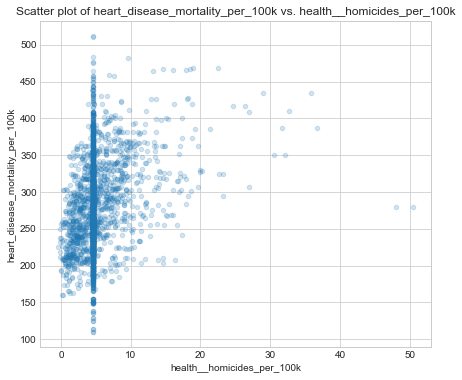

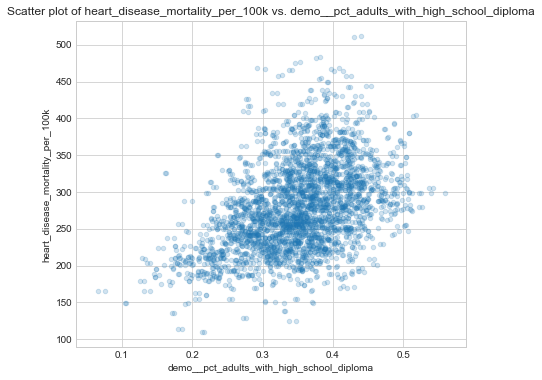

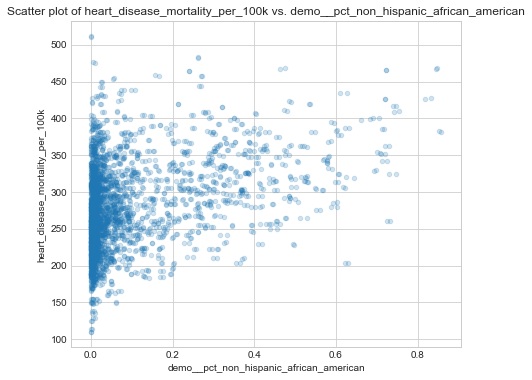

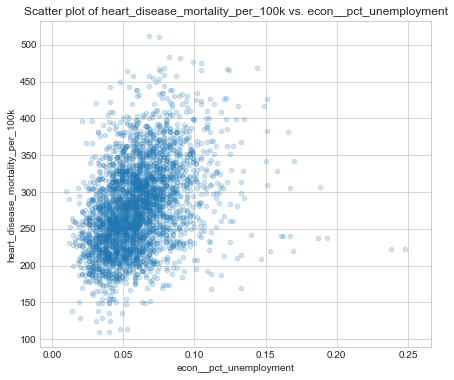

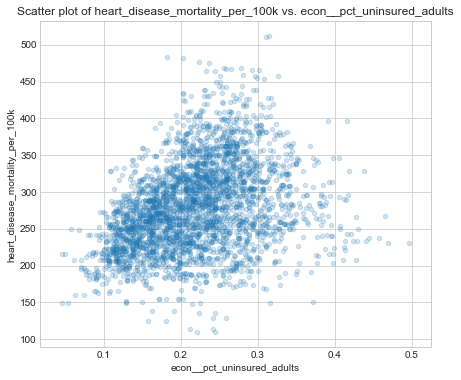

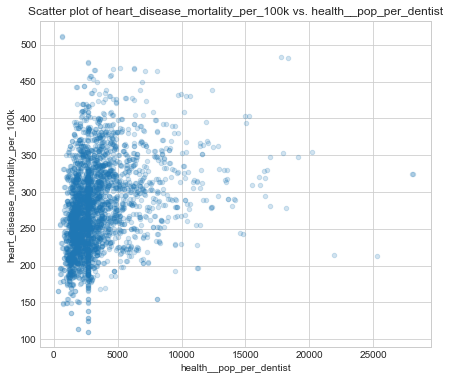

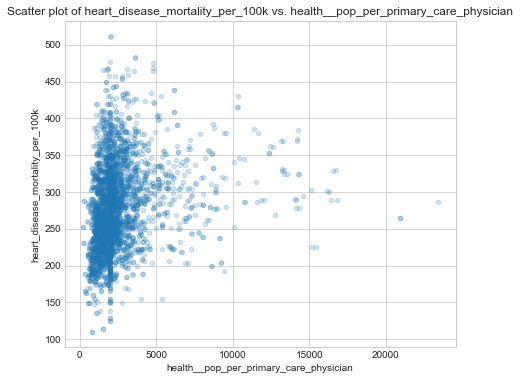

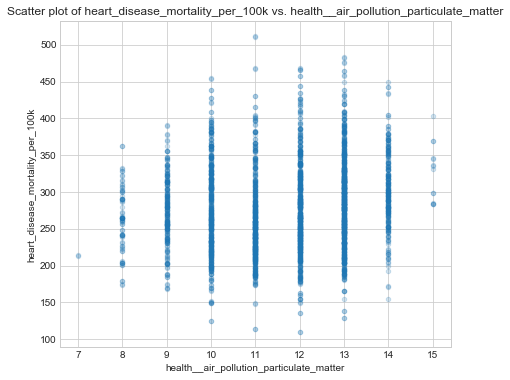

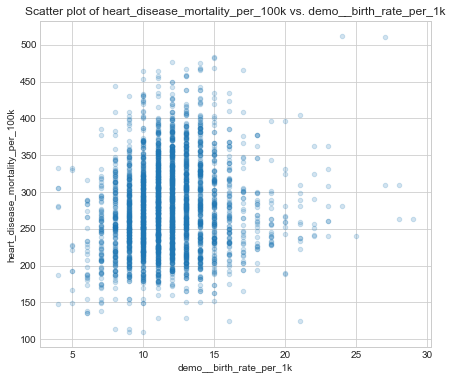

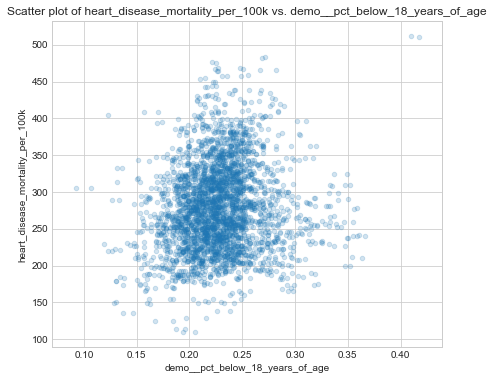

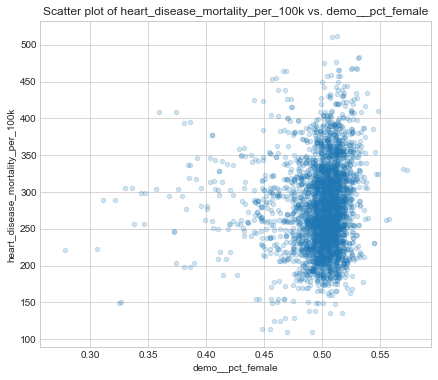

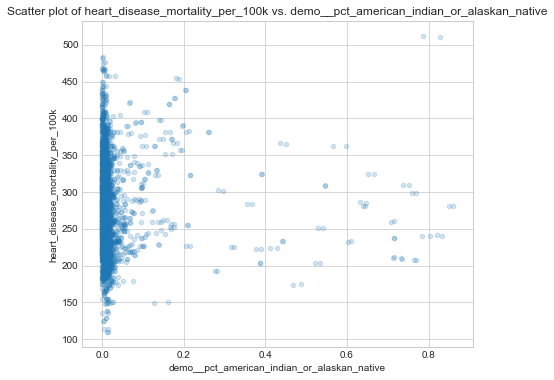

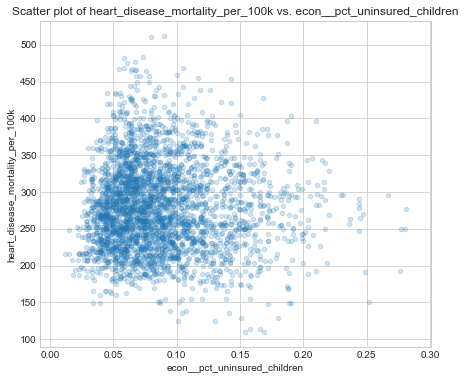

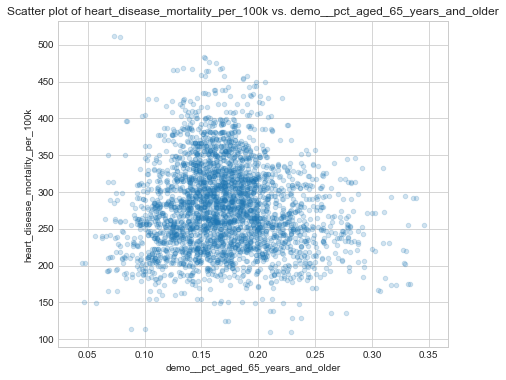

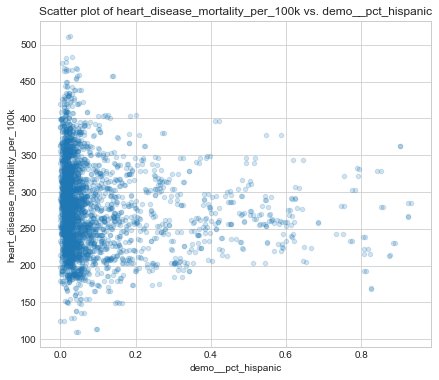

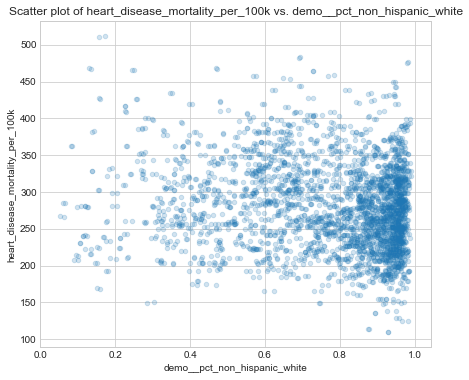

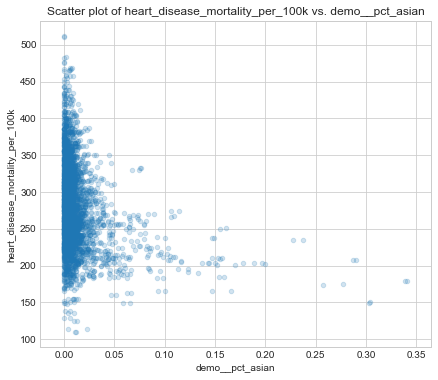

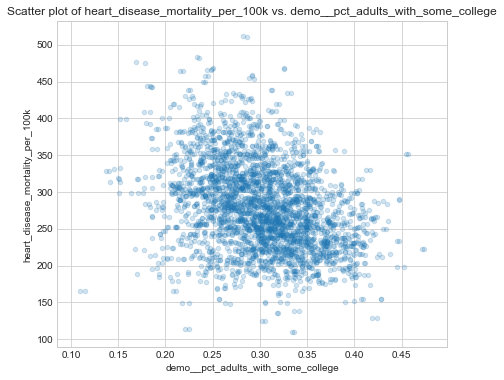

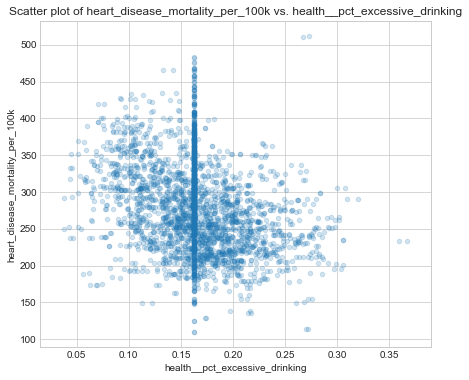

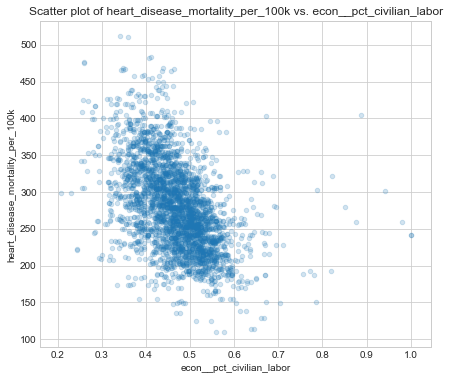

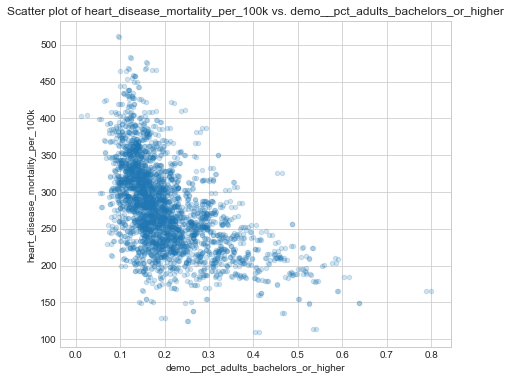

In [17]:
def plot_scatter_t(train, cols, col_y = "heart_disease_mortality_per_100k", alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) 
        ax = fig.gca()    
        train.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel(col_y)
        plt.show()

plot_scatter_t(train, num_cols, alpha = 0.2)

**Next we see the count values for each categorical features of the dataset:**

In [18]:
train["area__rucc"].value_counts()

Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                         608
Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area    484
Metro - Counties in metro areas of 1 million population or more                                  436
Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                     418
Metro - Counties in metro areas of 250,000 to 1 million population                               370
Metro - Counties in metro areas of fewer than 250,000 population                                 322
Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area        238
Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                          222
Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                      100
Name: area__rucc, dtype: int64

In [19]:
train["area__urban_influence"].value_counts()

Small-in a metro area with fewer than 1 million residents                                             692
Large-in a metro area with at least 1 million residents or more                                       436
Noncore adjacent to a small metro with town of at least 2,500 residents                               346
Micropolitan adjacent to a small metro area                                                           262
Micropolitan not adjacent to a metro area                                                             254
Noncore adjacent to micro area and does not contain a town of at least 2,500 residents                210
Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents    210
Noncore adjacent to micro area and contains a town of 2,500-19,999 residents                          206
Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents             176
Noncore adjacent to a large metro area        

In [20]:
train["econ__economic_typology"].value_counts()

Nonspecialized                        1266
Manufacturing-dependent                494
Farm-dependent                         482
Federal/State government-dependent     390
Recreation                             312
Mining-dependent                       254
Name: econ__economic_typology, dtype: int64

In [21]:
train["yr"].value_counts()

b    1599
a    1599
Name: yr, dtype: int64

**See the value counts as a barplot:**

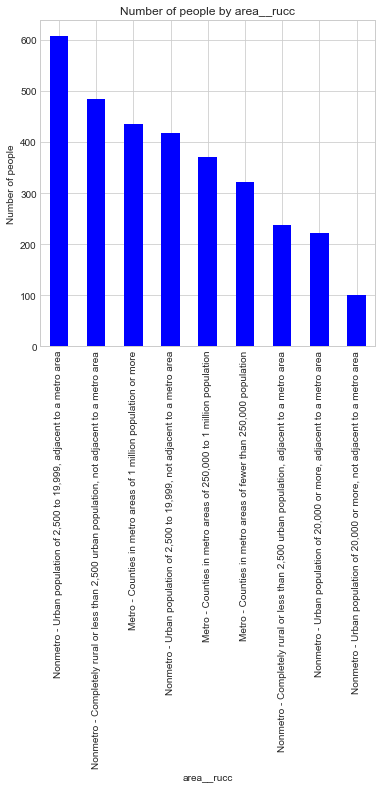

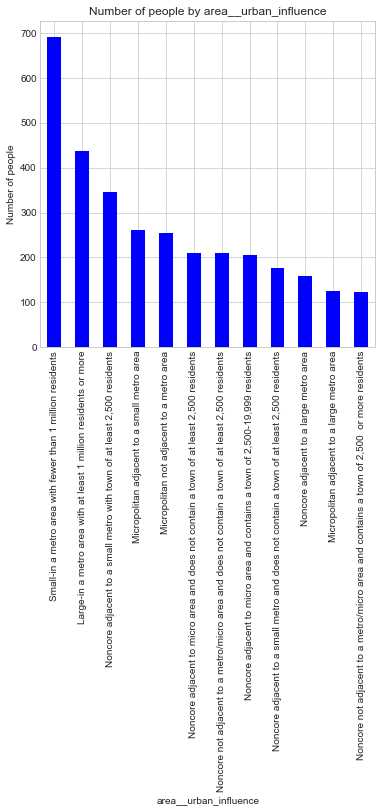

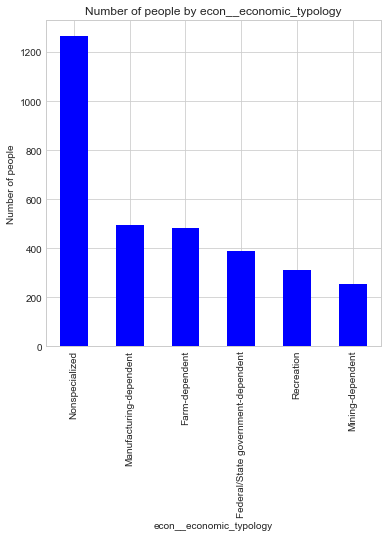

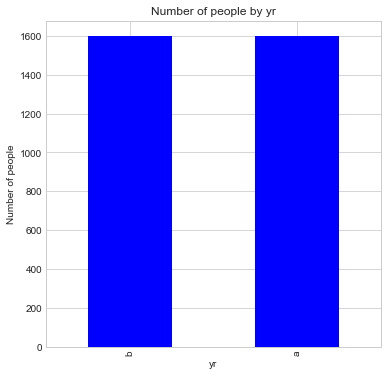

In [22]:
cat_cols = ["area__rucc", "area__urban_influence", "econ__economic_typology", 
             "yr"]

def plot_bars(train, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) 
        ax = fig.gca()     
        counts = train[col].value_counts() 
        counts.plot.bar(ax = ax, color = 'blue') 
        ax.set_title('Number of people by ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of people')
        plt.show()


plot_bars(train, cat_cols)

**Here we create boxplots to see the relationship between heart disease mortality with the categorical features:**

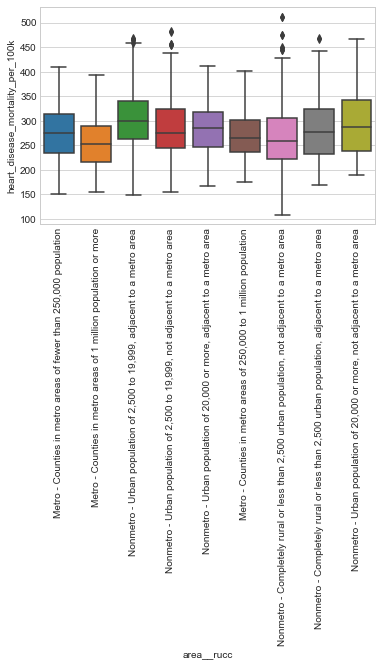

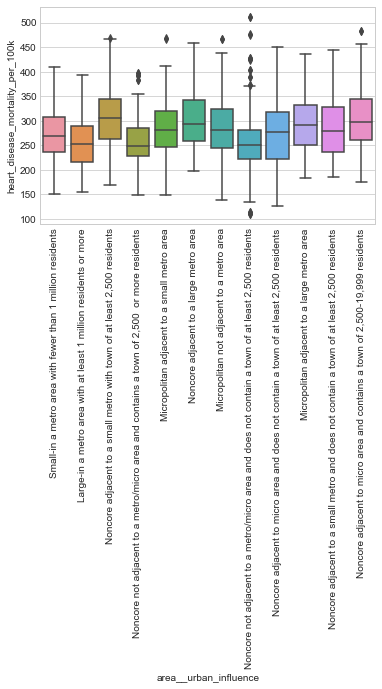

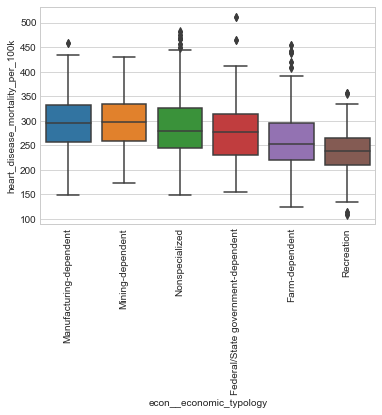

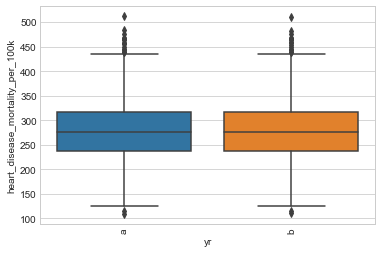

In [23]:
def plot_box(train, cols, col_y = "heart_disease_mortality_per_100k"):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data = train)
        plt.xlabel(col) 
        plt.ylabel(col_y)
        plt.xticks(rotation=90)
        plt.show()
        
plot_box(train, cat_cols) 

**Seperate the label from the training dataset**

In [24]:
train.drop(["heart_disease_mortality_per_100k"], axis=1, inplace=True)

**Finally, encode categorical variables to dummy binary variables before splitting:**

In [25]:
train = pd.get_dummies(train)
train.shape

(3198, 58)

In [26]:
test = pd.get_dummies(test)
test.shape

(3080, 58)

# *Prediction Models*

Five prediction models will be evaluated by comparing their RMSE error metrics and residual distributions:

1. Ridge (L2 Regularization)
2. Lasso (L1 Regularization)
3. Gradient Boosting 
3. XG Boost
4. Light Gradient Boosting

Let's start!

**Split the dataset to 70% training and 30% test for validation**

In [27]:
x_train, x_test, y_train, y_test = train_test_split(train, label, shuffle=True, train_size=0.7, random_state=0)

**Standardize the values:**

In [28]:
scale = StandardScaler()
scale.fit(x_train)
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

**Set up the functions to see the evaluation metrics and residual plots:**

In [29]:
def print_metrics(y_true, y_predicted):
    r2 = sklm.r2_score(y_true, y_predicted)
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    
def resid_plot(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()

def hist_resids(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    
def resid_qq(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Quantiles of standard Normal distribution')
    plt.ylabel('Quantiles of residuals')
    plt.show()

* **Ridge (L2 Regularization)**

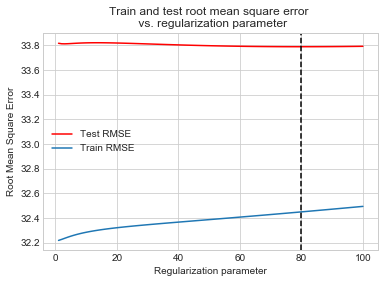

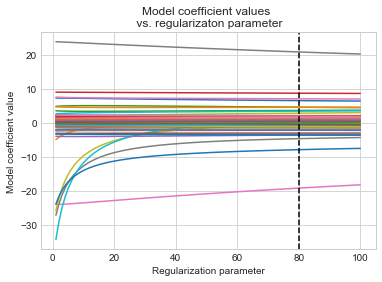

(80, 33.78989886513291)


In [30]:
def plot_regularization(l, train_RMSE, test_RMSE, coefs, min_idx, title):   
    plt.plot(l, test_RMSE, color = 'red', label = 'Test RMSE')
    plt.plot(l, train_RMSE, label = 'Train RMSE')    
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.legend()
    plt.xlabel('Regularization parameter')
    plt.ylabel('Root Mean Square Error')
    plt.title(title)
    plt.show()
    
    plt.plot(l, coefs)
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.title('Model coefficient values \n vs. regularizaton parameter')
    plt.xlabel('Regularization parameter')
    plt.ylabel('Model coefficient value')
    plt.show()

def test_regularization_l2(x_train, y_train, x_test, y_test, l2):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l2:
        lin_mod = Ridge(alpha = reg)
        lin_mod.fit(x_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(y_train, y_score_train)**0.5)
        y_score = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(y_test, y_score)**0.5)
    min_idx = np.argmin(test_RMSE)
    min_l2 = l2[min_idx]
    min_RMSE = test_RMSE[min_idx] 
    
    title = 'Train and test root mean square error \n vs. regularization parameter'
    plot_regularization(l2, train_RMSE, test_RMSE, coefs, min_l2, title)
    return min_l2, min_RMSE
     
l2 = [x for x in range(1,101)]
out_l2 = test_regularization_l2(x_train, y_train, x_test, y_test, l2)
print(out_l2)

**Notes:** 

- The top plot shows the training and test RMSE vs the regularization parameter. The point with the minimum RMSE is shown with a dotted line. There is a minimum where the l2 parameter has a value of 80.

- The bottom plot shows the value of the 45 model coefficients vs. the regularization parameter. At the left the regularization penalty is small and the coefficient values show a wide range of values, giving a high variance model. To the right the coefficient values become more tightly clustered, giving a more constrained and higher bias model

Mean Square Error      = 1141.7572653159107
Root Mean Square Error = 33.78989886513291
Mean Absolute Error    = 25.992787645956398
Median Absolute Error  = 20.761140366969016
R^2                    = 0.6618467054717804


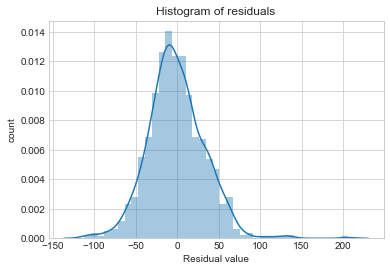

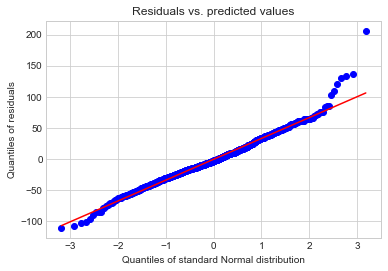

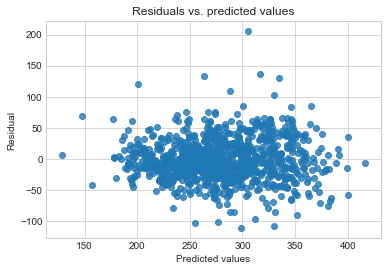

In [31]:
lin_mod_l2 = Ridge(alpha = out_l2[0])
lin_mod_l2.fit(x_train, y_train)
y_score_l2 = lin_mod_l2.predict(x_test)

print_metrics(y_test, y_score_l2)
hist_resids(y_test, y_score_l2)  
resid_qq(y_test, y_score_l2) 
resid_plot(y_test, y_score_l2) 

The **Ridge** Model yields a RMSE value of 33.79 and an R^2 value of 66%. This is a poor model explaining 66% of the variability of the model and a not so good RMSE value. The residual look normally distributed with a constant variance spread. We need to look at other models for better performance.

* **Lasso (L1 Regularization)**

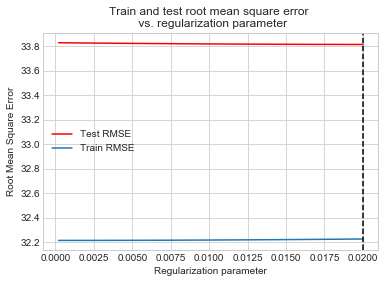

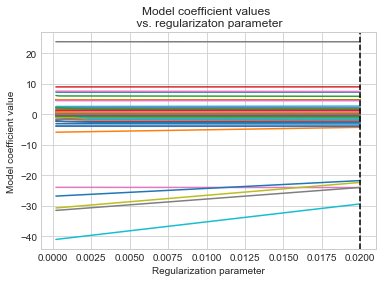

(0.02, 33.81538189006959)


In [32]:
def test_regularization_l1(x_train, y_train, x_test, y_test, l1):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l1:
        lin_mod = Lasso(alpha = reg)
        lin_mod.fit(x_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(y_train, y_score_train)**0.5)
        y_score = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(y_test, y_score)**0.5)
    min_idx = np.argmin(test_RMSE)
    min_l1 = l1[min_idx]
    min_RMSE = test_RMSE[min_idx]
    
    title = 'Train and test root mean square error \n vs. regularization parameter'
    plot_regularization(l1, train_RMSE, test_RMSE, coefs, min_l1, title)
    return min_l1, min_RMSE

l1 = [x/5000 for x in range(1,101)]
out_l1 = test_regularization_l1(x_train, y_train, x_test, y_test, l1)
print(out_l1)

**Note:**  Again, the top plot shows the training and test RMSE vs the regularization parameter. The point with the minimum RMSE is shown with a dotted line. There is a minimum where the l1 parameter has a value of 0.02. The bottom plot shows the value of the 45 model coefficients vs. the regularization parameter. 

Mean Square Error      = 1143.480052371246
Root Mean Square Error = 33.81538189006959
Mean Absolute Error    = 25.979814709158724
Median Absolute Error  = 20.60292288685683
R^2                    = 0.6613364690702006


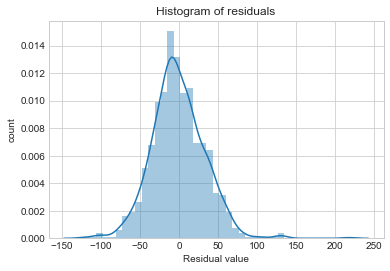

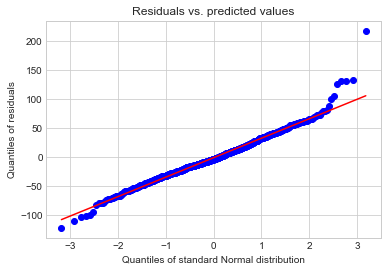

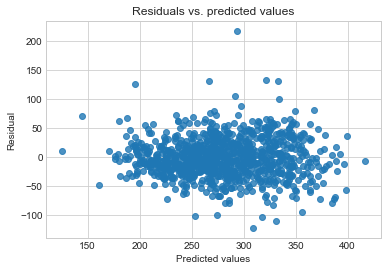

In [33]:
lin_mod_l1 = Lasso(alpha = out_l1[0])
lin_mod_l1.fit(x_train, y_train)
y_score_l1 = lin_mod_l1.predict(x_test)

print_metrics(y_test, y_score_l1) 
hist_resids(y_test, y_score_l1)  
resid_qq(y_test, y_score_l1) 
resid_plot(y_test, y_score_l1)

The **Lasso** Model yields a RMSE value of 33.81 and an R^2 value of 66%. This is a poor model explaining 66% of the variability of the model and is not of any imporovement from previous model. The residual look normally distributed with a constant variance spread as shown above. Let's explore more to find better performance models.

* **Gradient Boosting Regressor**

In [34]:
nr.seed(111)
GB_mod = GradientBoostingRegressor(n_estimators = 500, 
    max_depth= 5, 
    min_samples_split= 3,
    learning_rate= 0.05,
    loss= 'ls',
    criterion= 'mse') 
GB_mod.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

Mean Square Error      = 813.1027756489783
Root Mean Square Error = 28.514957051501558
Mean Absolute Error    = 21.76834852331386
Median Absolute Error  = 17.211447885852493
R^2                    = 0.759184030854697


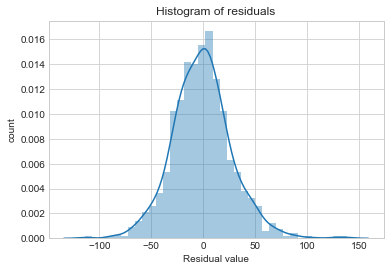

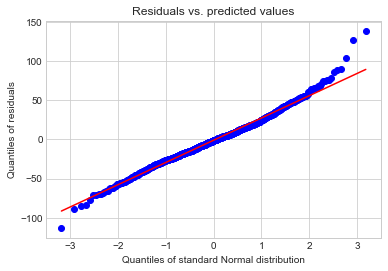

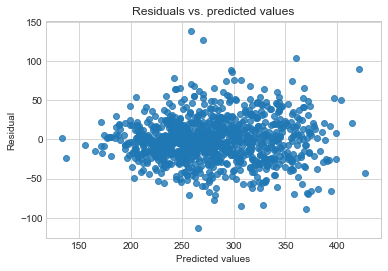

In [35]:
GB_preds = GB_mod.predict(x_test)
print_metrics(y_test, GB_preds) 
hist_resids(y_test, GB_preds)  
resid_qq(y_test, GB_preds) 
resid_plot(y_test, GB_preds) 

The **Gradient Boosting** Model yields a RMSE value of 28.51 and an R^2 value of 75%. This is a decent model explaining 75% of the variability of the model and a better RMSE values than previous models. The residual also look normally distributed with a constant variance spread as shown above. We can keep this model as the best for now.

**See the top 10 most important features for the model:**

In [36]:
feature_importances = pd.DataFrame(GB_mod.feature_importances_,
                                   train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)[:10]
feature_importances

importance
demo__pct_adults_less_than_a_high_school_diploma    0.050601
health__pop_per_primary_care_physician              0.048305
demo__pct_aged_65_years_and_older                   0.044651
demo__pct_adults_with_some_college                  0.044273
demo__pct_adults_with_high_school_diploma           0.043091
health__pct_physical_inacticity                     0.042379
health__pop_per_dentist                             0.040715
health__motor_vehicle_crash_deaths_per_100k         0.036741
demo__pct_adults_bachelors_or_higher                0.036479
demo__pct_non_hispanic_white                        0.033876

* **XG Boost**

In [37]:
nr.seed(11)
XGB_mod = XGBRegressor(learning_rate=0.05, max_depth=3) 
XGB_mod.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Mean Square Error      = 1097.519504657858
Root Mean Square Error = 33.1288319241391
Mean Absolute Error    = 25.34594553311666
Median Absolute Error  = 20.36529541015625
R^2                    = 0.6749485660541453


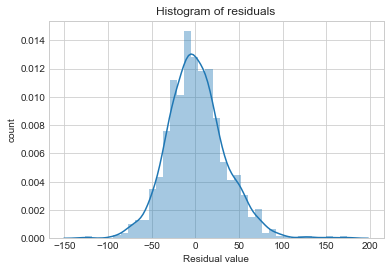

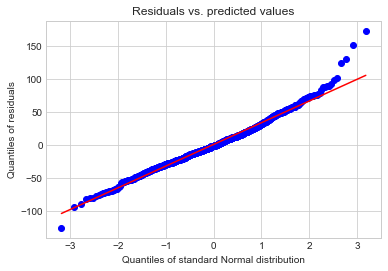

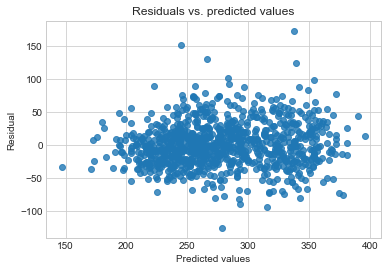

In [38]:
XGB_preds = XGB_mod.predict(x_test)
print_metrics(y_test, XGB_preds) 
hist_resids(y_test, XGB_preds)  
resid_qq(y_test, XGB_preds) 
resid_plot(y_test, XGB_preds) 

The **XG Boost** Model yields a RMSE value of 33.13 and an R^2 value of 67%. This is a poor model explaining 67% of the variability of the model and a RMSE value similar to Ridge and Lasso models. The residual look normally distributed with a constant variance.

**See the top 10 most important features for the model:**

In [39]:
feature_importances = pd.DataFrame(XGB_mod.feature_importances_,
                                   index = train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)[:10]
feature_importances

importance
demo__death_rate_per_1k                             0.136628
demo__pct_aged_65_years_and_older                   0.110465
health__pct_physical_inacticity                     0.058140
demo__pct_adults_less_than_a_high_school_diploma    0.056686
econ__pct_civilian_labor                            0.053779
health__motor_vehicle_crash_deaths_per_100k         0.047965
health__pct_low_birthweight                         0.047965
demo__pct_adults_bachelors_or_higher                0.046512
demo__pct_non_hispanic_african_american             0.045058
demo__pct_american_indian_or_alaskan_native         0.042151

* **Light Gradient Boosting**

In [40]:
nr.seed(11)
LGBM_mod = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720) 
LGBM_mod.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.05, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=720,
       n_jobs=-1, num_leaves=5, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

Mean Square Error      = 943.9920859721296
Root Mean Square Error = 30.724454201370765
Mean Absolute Error    = 23.596644229457766
Median Absolute Error  = 19.104292447700686
R^2                    = 0.7204186532662709


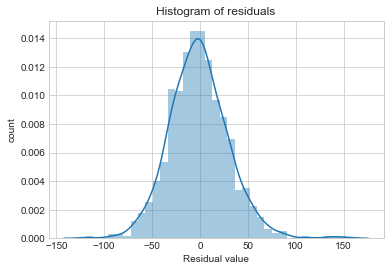

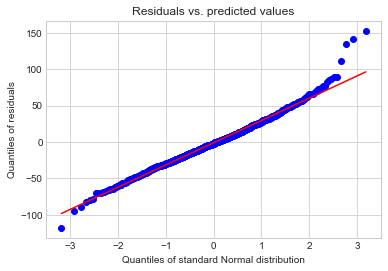

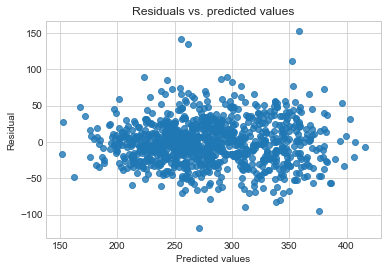

In [41]:
LGBM_preds = LGBM_mod.predict(x_test)
print_metrics(y_test, LGBM_preds) 
hist_resids(y_test, LGBM_preds)  
resid_qq(y_test, LGBM_preds) 
resid_plot(y_test, LGBM_preds)

The **Light Gradient Boosting Model** yields a RMSE value of 30.72 and an R^2 value of 72%. This is a decent model explaining 72% of the variability of the model and a better RMSE values than previous models. The residual also look normally distributed with a constant variance spread as shown above. Let's also consider using this model.

**See the top 10 most important features for the model:**

In [42]:
feature_importances = pd.DataFrame(LGBM_mod.feature_importances_,
                                   index = train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)[:10]
feature_importances

importance
demo__pct_aged_65_years_and_older                        205
demo__death_rate_per_1k                                  148
demo__pct_adults_less_than_a_high_school_diploma         142
demo__pct_non_hispanic_white                             134
demo__pct_american_indian_or_alaskan_native              120
health__pop_per_primary_care_physician                   118
demo__pct_adults_with_some_college                       111
demo__pct_adults_bachelors_or_higher                     108
econ__pct_uninsured_adults                               106
health__pop_per_dentist                                  102

**Apply the best model to the original train set for the prediction to the original test data:**

In [43]:
LGBM_mod.fit(train, label)
LGBM_preds = LGBM_mod.predict(test)
LGBM_preds = np.round(LGBM_preds)

**Convert the submission to a csv file for the submission:**

In [44]:
prediction_df = pd.DataFrame({'row_id': test_Id, 'heart_disease_mortality_per_100k': LGBM_preds})

#prediction_df.to_csv("prediction.csv", index = False)